In [1]:
## 15.15 (LINEAR REGRESSION WITH THE DIABETES DATASET)

In [ ]:
## Visualizing some of the data using Matplotlib and Seaborn,so launch IPython with Matplotlib support:

In [16]:
%matplotlib inline

In [17]:
## Loading the dataset from scikits learns/ Diabetes Data

In [18]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [ ]:
## Displaying the Dataet's Description

In [19]:
print (diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [20]:
## We are confirming the number of samples(rows and features(columns) by looking at the data array's shape attribute.

In [21]:
diabetes.data.shape

(442, 10)

In [22]:
## Number of target values

In [23]:
diabetes.target.shape

(442,)

In [24]:
## Bunch's feature_names attribute contains the names that correspond to each column in the data array:

In [25]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [26]:
## Importing Pandas
##1. ' display. precision' is the maximum number of digits to display to the right of each decimal point.
##2. ' display. max_columns' is the maximum number of columns to display when you output the Dataframe's string representation.
##3. ' display. width' specifies the width in characters of your Command Prompt, Terminal, or shell.

In [76]:
import pandas as pd
pd.set_option('display.precision', 4)
pd.set_option('display.max_columns', 11)
pd.set_option('display.width', None)

In [72]:
## Creating a DataFrame from the Bunch's data, target, and feature_names arrays.

In [149]:
diabetes_df = pd.DataFrame(diabetes.data,
                           columns=diabetes.feature_names)
diabetes_df['Diabetes Data Value'] = diabetes.target
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Diabetes Data Value
0,0.0381,0.0507,0.0617,0.0219,-0.0442,-0.0348,-0.0434,-0.0026,0.0199,-0.0176,151.0
1,-0.0019,-0.0446,-0.0515,-0.0263,-0.0084,-0.0192,0.0744,-0.0395,-0.0683,-0.0922,75.0
2,0.0853,0.0507,0.0445,-0.0057,-0.0456,-0.0342,-0.0324,-0.0026,0.0029,-0.0259,141.0
3,-0.0891,-0.0446,-0.0116,-0.0367,0.0122,0.0250,-0.0360,0.0343,0.0227,-0.0094,206.0
4,0.0054,-0.0446,-0.0364,0.0219,0.0039,0.0156,0.0081,-0.0026,-0.0320,-0.0466,135.0


In [150]:
## Statistical Summary 

In [151]:
diabetes_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Diabetes Data Value
count,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,442.0000
mean,-2.5118e-19,1.2308e-17,-2.2456e-16,-4.7976e-17,-1.3815e-17,3.9184e-17,-5.7772e-18,-9.0425e-18,9.2937e-17,1.1303e-17,152.1335
std,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,77.0930
min,-1.0723e-01,-4.4642e-02,-9.0275e-02,-1.1240e-01,-1.2678e-01,-1.1561e-01,-1.0231e-01,-7.6395e-02,-1.2610e-01,-1.3777e-01,25.0000
25%,-3.7299e-02,-4.4642e-02,-3.4229e-02,-3.6656e-02,-3.4248e-02,-3.0358e-02,-3.5117e-02,-3.9493e-02,-3.3246e-02,-3.3179e-02,87.0000
50%,5.3831e-03,-4.4642e-02,-7.2838e-03,-5.6704e-03,-4.3209e-03,-3.8191e-03,-6.5845e-03,-2.5923e-03,-1.9472e-03,-1.0777e-03,140.5000
75%,3.8076e-02,5.0680e-02,3.1248e-02,3.5644e-02,2.8358e-02,2.9844e-02,2.9312e-02,3.4309e-02,3.2432e-02,2.7917e-02,211.5000
max,1.1073e-01,5.0680e-02,1.7056e-01,1.3204e-01,1.5391e-01,1.9879e-01,1.8118e-01,1.8523e-01,1.3360e-01,1.3561e-01,346.0000


In [152]:
## We are using a dataframe method sample to randomly select 10% of the 442 samples for graphing purposes.

In [153]:
sample_df = diabetes_df.sample(frac=0.1,random_state=17)

In [154]:
## We import both libraries and use Seaborn function set to scale each diagram’s fonts to 
### two times their default size:
## Using Matplotlib and Seaborn to display a scatter plot of each of the eight features. 

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)
sns.set_style('whitegrid')

In [156]:
## Creates a Seaborn scatterplot in which the x-axis shows the current feature, 
### the y-axis shows the 'DiabetesDataValue' (median values),
#### and the 'DiabetesDataValue' determines the dot colors (hue).

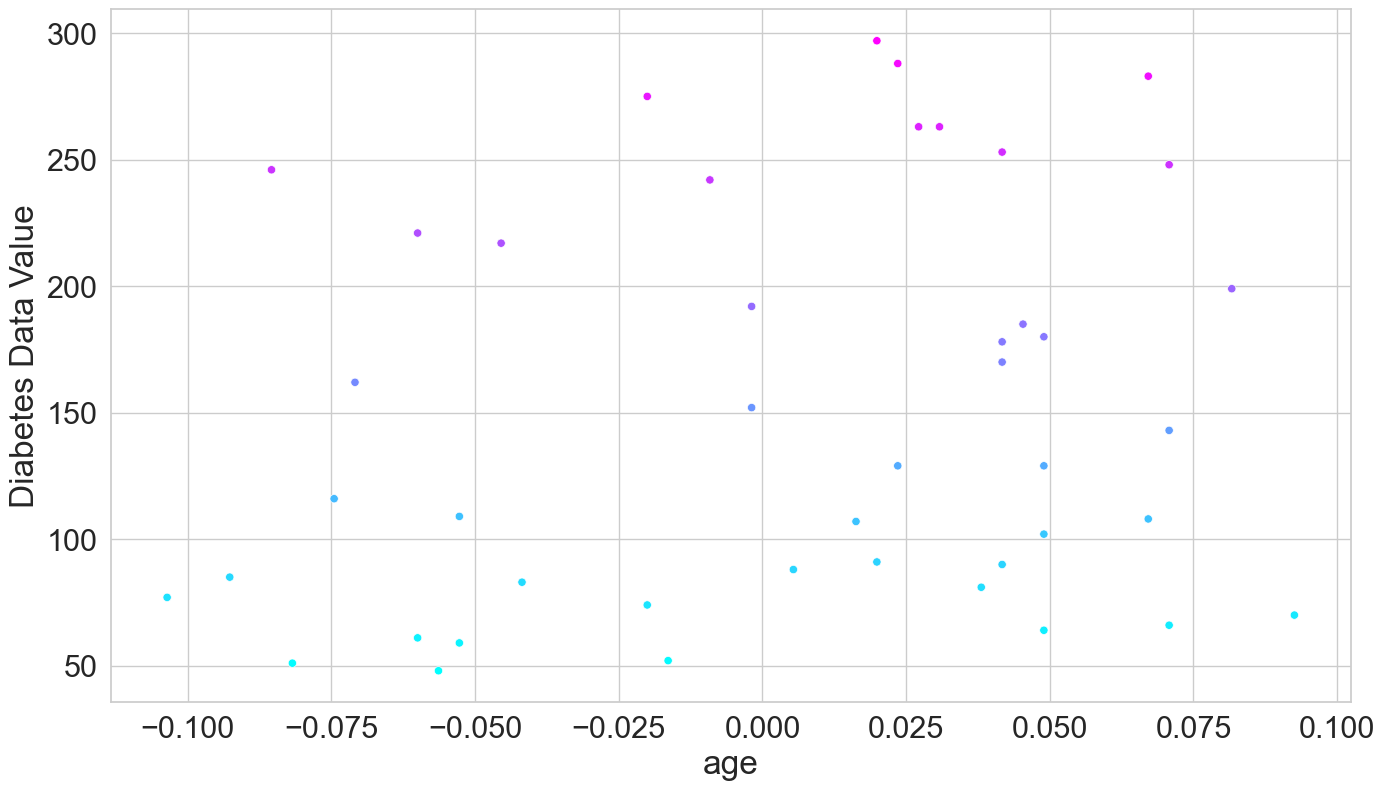

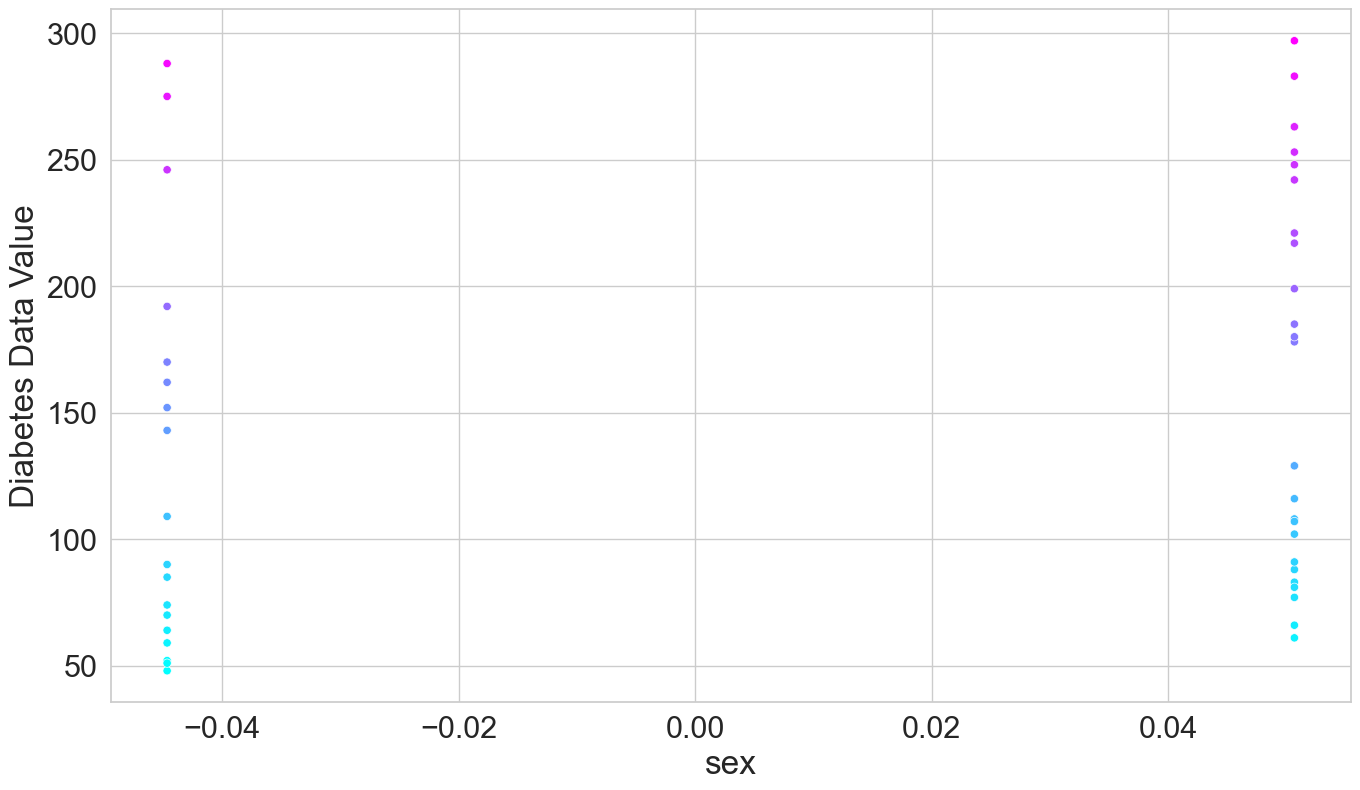

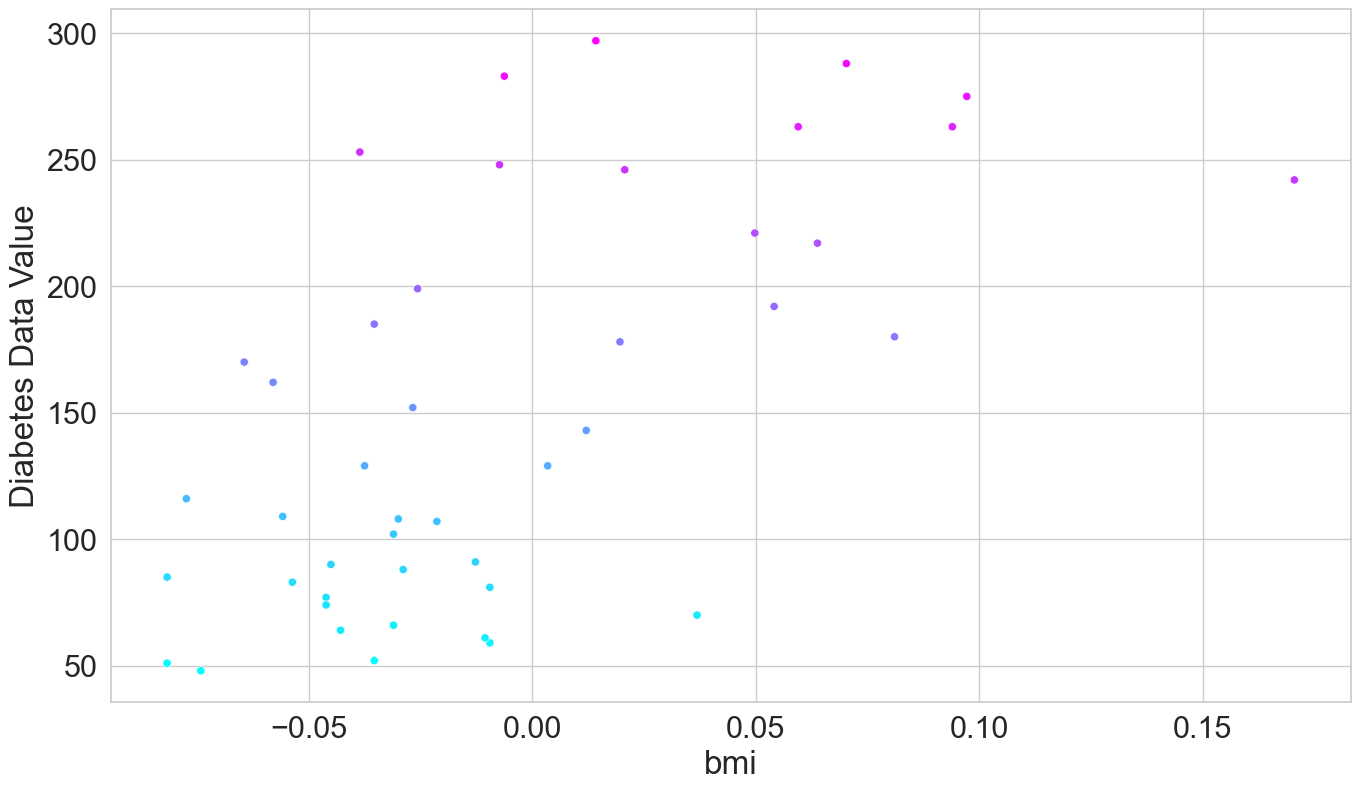

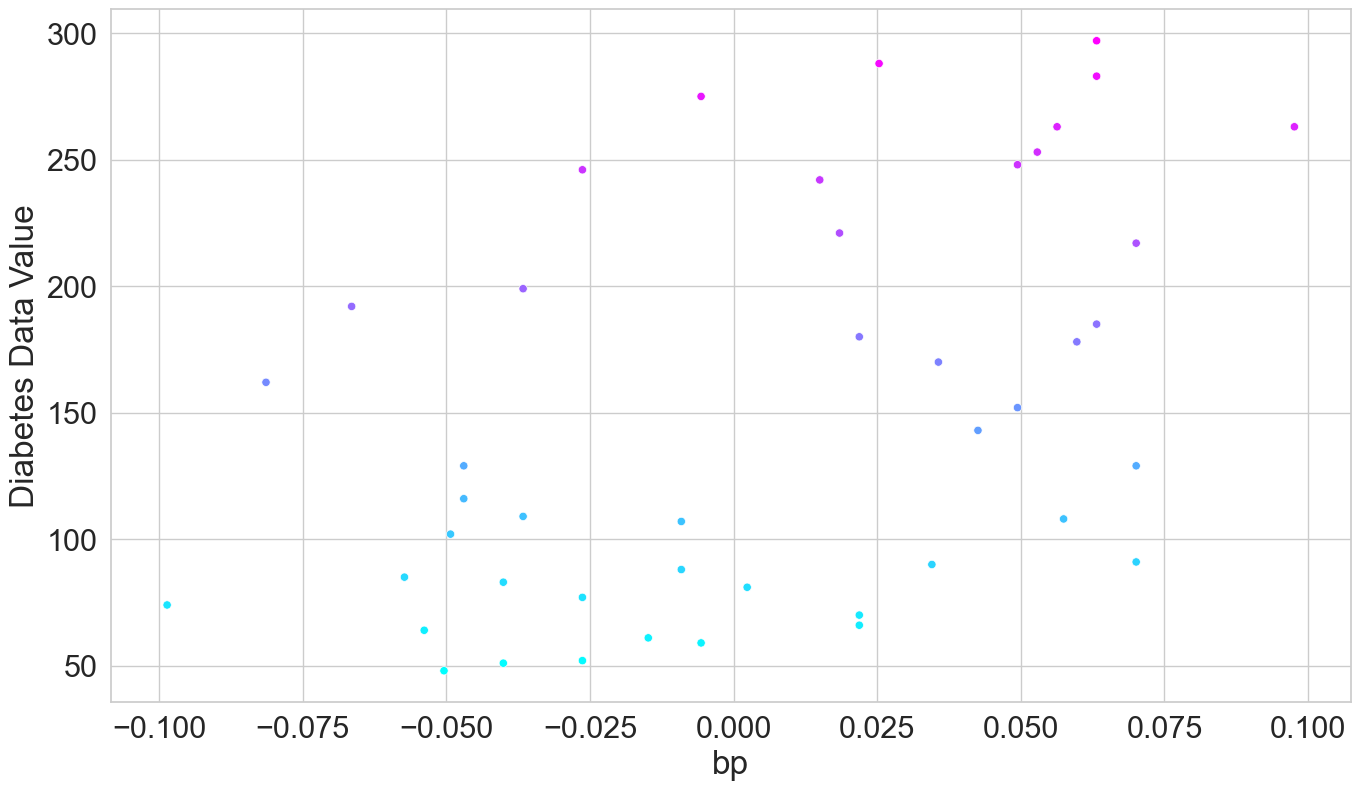

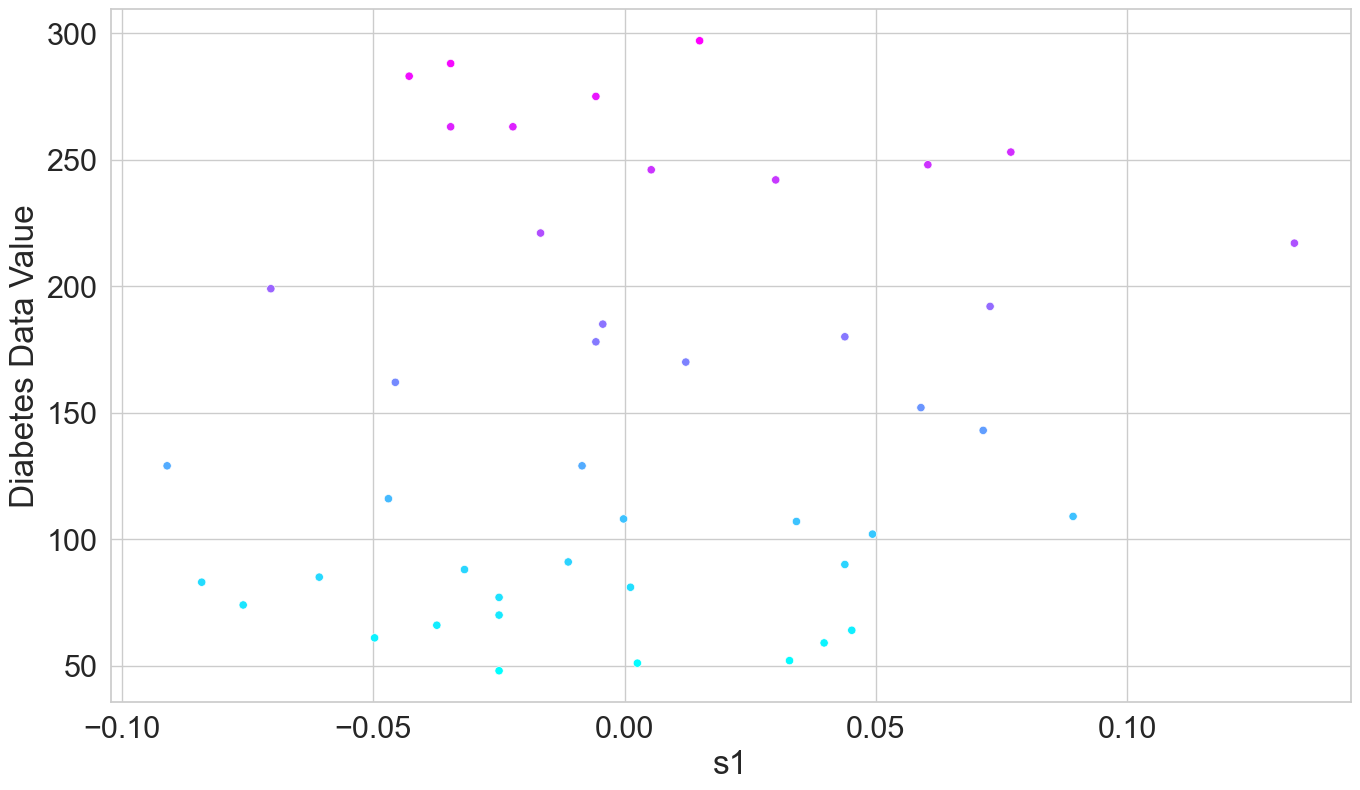

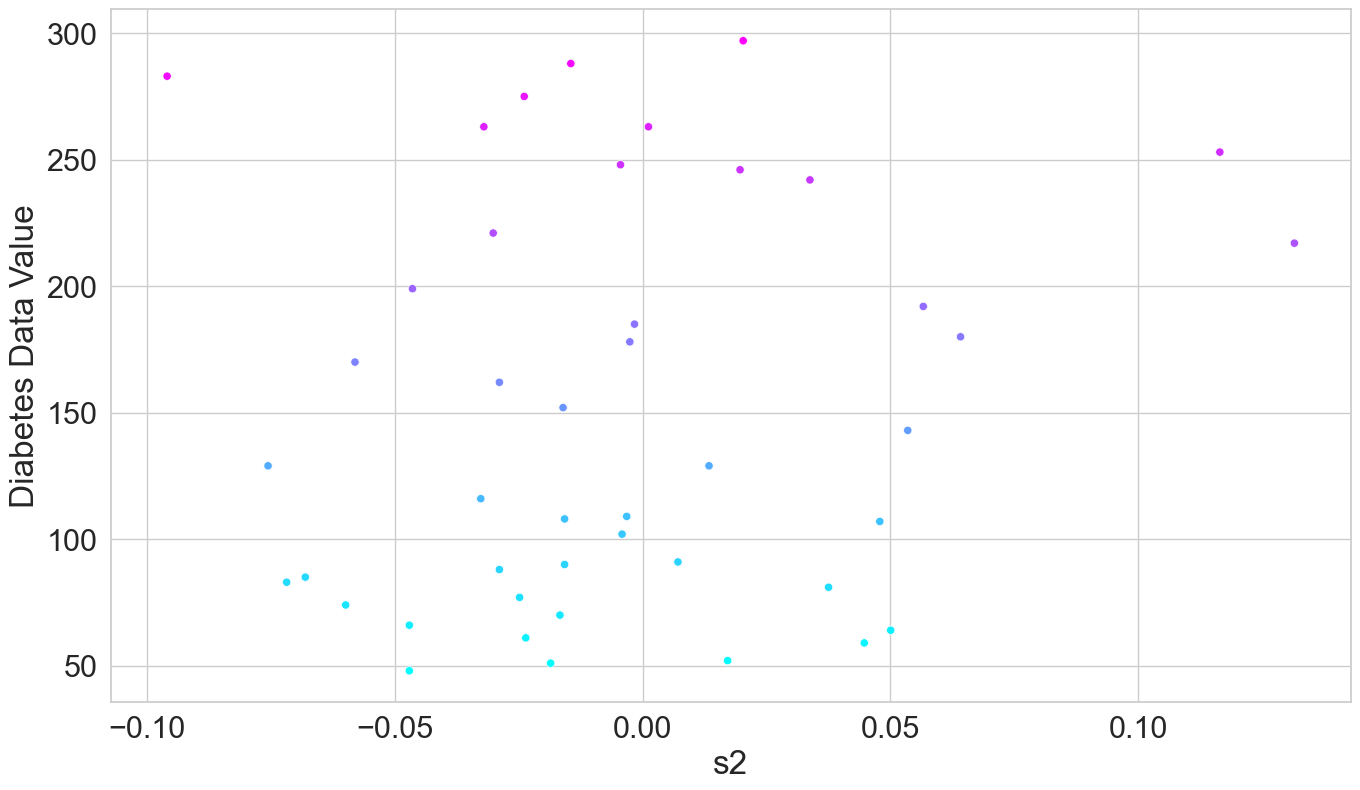

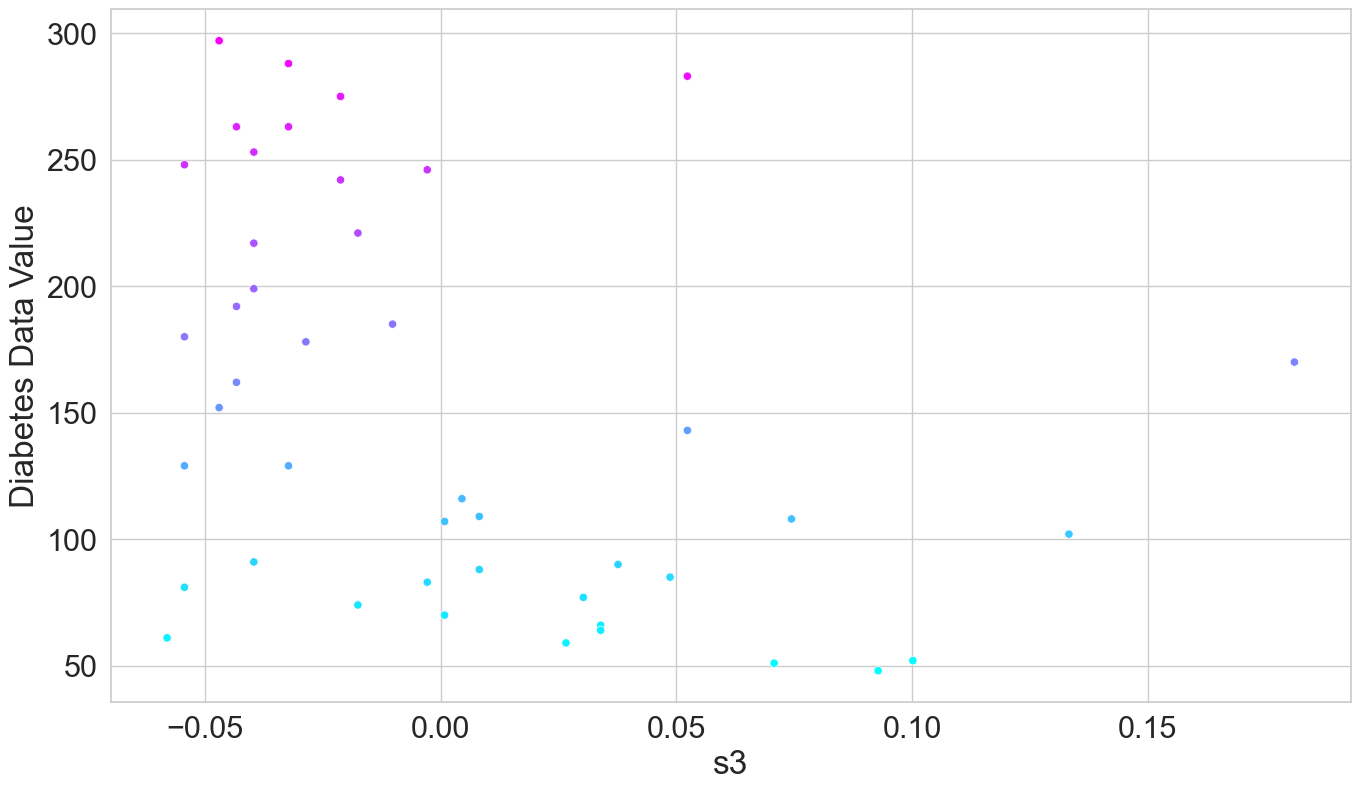

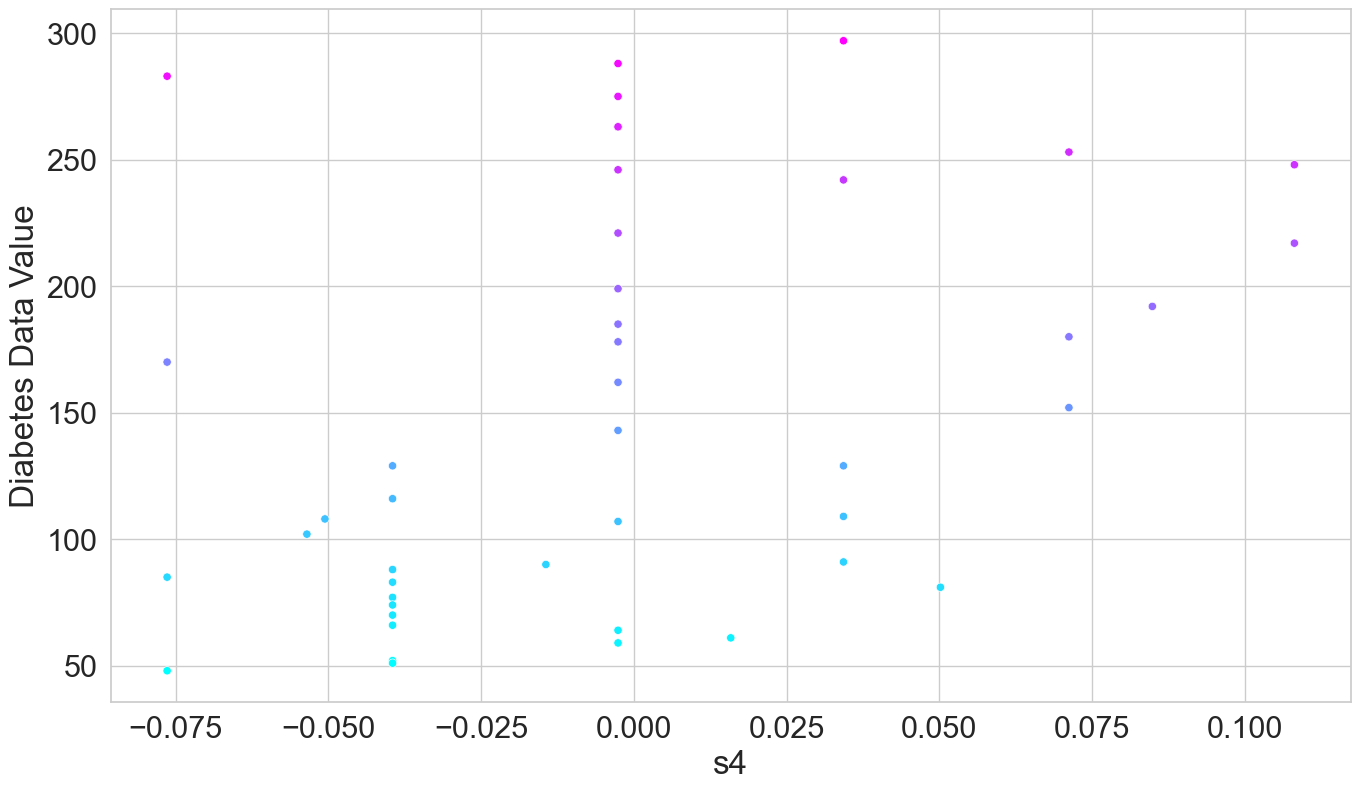

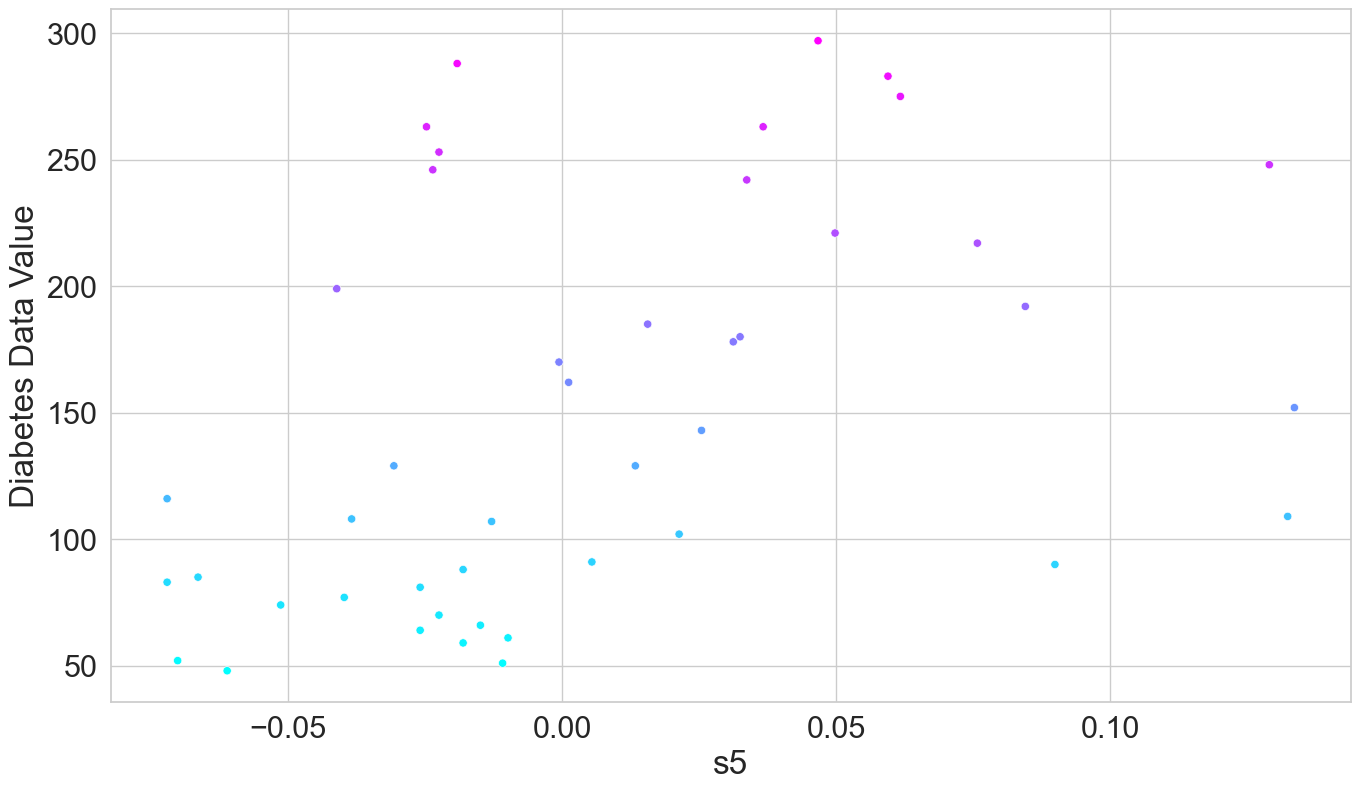

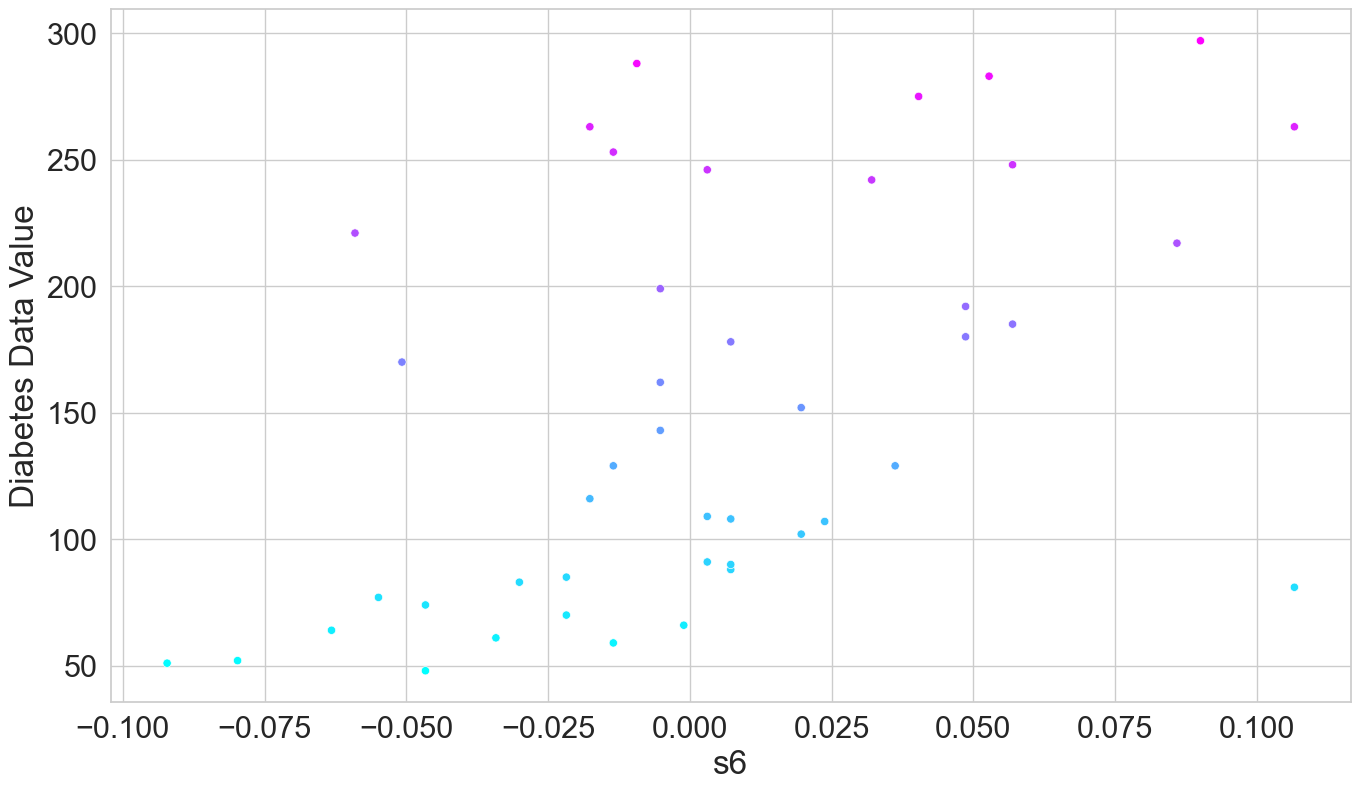

In [157]:
for feature in diabetes.feature_names:
    plt.figure(figsize=(16,9))
    sns.scatterplot(data=sample_df,
                    x=feature,
    y='Diabetes Data Value',
    hue='Diabetes Data Value',
    palette='cool', 
    legend=False)

In [88]:
## Train and testing the model, using function that check their sizes.

In [93]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, random_state=11)

x_train.shape  

(331, 10)

In [97]:
x_test.shape

(111, 10)

In [98]:
## Create a LinearRegression estimator and invoke its fit method to train the estimator using X_train and y_train:

In [111]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X=x_train, y=y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [112]:
## Multiple linear regression produces separate coefficients for each feature (stored in coeff_) in 
## the dataset and one intercept (stored in intercept_):

In [115]:
for i, name in enumerate(diabetes.feature_names):
    print(f'{name:>10}: {linear_regression.coef_[i]}')

       age: -60.21981405677281
       sex: -266.4570523220364
       bmi: 523.0634112596995
        bp: 310.513469967005
        s1: -336.1614738106951
        s2: 137.33929238424528
        s3: -131.1392328345364
        s4: -1.1492348017314904
        s5: 622.3286855688128
        s6: 60.46645769168246


In [117]:
linear_regression.intercept_

np.float64(152.22822762230342)

In [118]:
## Storing the array of predictions in predicted and the array of expected values in expected:

In [120]:
predicted = linear_regression.predict(x_test)
expected = y_test

In [158]:
## First five predictions and expections

In [159]:
predicted[:5]

array([115.46474836,  83.4585369 , 160.77727376, 187.65710274,
        72.72122197])

In [160]:
expected[:5]

array([ 79.,  55., 109., 178.,  39.])

In [124]:
## Now let’s plot the data as a scatter plot with the expected (target) prices along the x-axis and 
### the predicted prices along the y-axis:

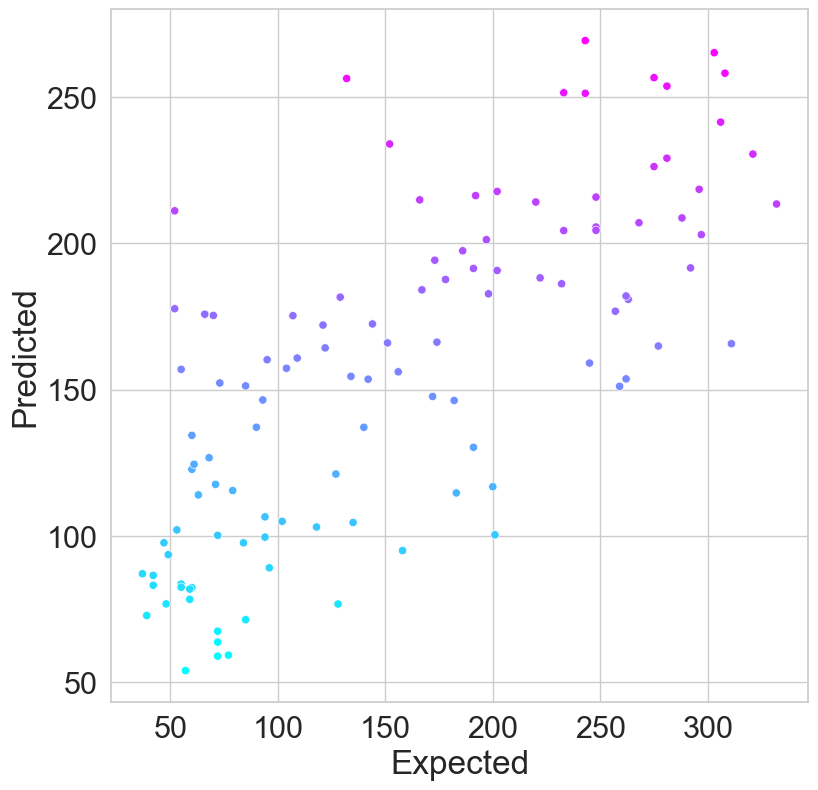

In [127]:
df = pd.DataFrame()

df['Expected'] = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)
figure = plt.figure(figsize=(9, 9))

axes = sns.scatterplot(data=df, x='Expected', y='Predicted',
                       hue='Predicted', palette='cool', legend=False)

In [128]:
## Set the x- and y-axes’ limits to use the same scale along both axes:

In [129]:
start = min(expected.min(), predicted.min())

end = max(expected.max(), predicted.max())

axes.set_xlim(start, end)

(37.0, 332.0)

In [130]:
axes.set_ylim(start, end)

(37.0, 332.0)

In [131]:
## Plot a line that represents perfect predictions,plotting a line that represents perfect predictions.

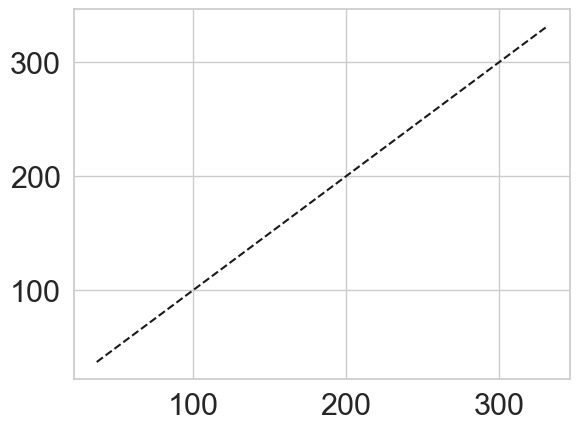

In [132]:
line = plt.plot([start, end], [start, end], 'k--')

In [133]:
## To calculate an estimator’s R 2 score, call the sklearn.metrics module’s r2_score 
### function with the arrays representing the expected and predicted results:

In [134]:
from sklearn import metrics

metrics.r2_score(expected, predicted)

0.5322429620529407

In [162]:
## To calculate an estimator’s mean squared error, call the function mean_squared_error (from module sklearn.metrics) 
## with the arrays representing the expected and predicted results:

In [136]:
metrics.mean_squared_error(expected, predicted)

3458.2307025173577

In [ ]:
## Choosing the best model

In [167]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge
estimators = {
    'LinearRegression': linear_regression,
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

In [166]:
from sklearn.model_selection import KFold, cross_val_score

for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object,
    X=diabetes.data, y=diabetes.target, cv=kfold,
                             scoring='r2')
    print(f'{estimator_name:>16}: ' +
          f'mean of r2 scores={scores.mean():.3f}')

LinearRegression: mean of r2 scores=0.475
      ElasticNet: mean of r2 scores=-0.002
           Lasso: mean of r2 scores=0.339
           Ridge: mean of r2 scores=0.421
